#  Ordindary least squares regression (linear regression), manual and API approaches.

##### This tutorial will cover some first examples in ordinary least squares regression. First we will solve an example using matrices and matrix calculations. Having the knowledge to apply the scientific methods of mathematics to real world scenarious involing complex systems, computationally is a very powerful tool. API's are useful, but can limit our understanding of the underlying mechanics of models.

##### When solving inconsistent systems of the form $A\textbf{x}=\textbf{b}$ we need clever ways to approximate $\textbf{b}$ by finding an $\textbf{x}$ that makes $A\textbf{x}$ as close to $\textbf{b}$ as possible. Where the distance between $\textbf{b}$ and $A\textbf{x}$ is given by $ \| \textbf{b} - A\textbf{x}\|$.
#####   The $\textbf{general least-squares problem}$ is to find an $\textbf{x}$ that makes  $ \| \textbf{b} - A\textbf{x}\|$ as small as possible. The adjective "least-squares" arises from the fact that  $ \| \textbf{b} - A\textbf{x}\|$ is the square root of a sum of squares.  

##### By the orthogonal decomposition theorem, $\text{b}- A\hat{\textbf{x}}$ is orthogonal to each column of $A$. Such an $\hat{\textbf{x}}$ in $\mathbb{R}^n$ is a list of weights that will build $\hat{\textbf{b}}$ out of the columns of $A$.

##### If $\textbf{a}_j$ is any column of $A$, then $\textbf{a}_j \cdot (\text{b}- A\hat{\textbf{x}})=\textbf{0}$ and $\textbf{a}_j^T(\text{b}- A\hat{\textbf{x}})=\textbf{0}$. Since each $\textbf{a}_j^T$ is a row of $A^T$,

##### $$A^T (\text{b}- A\hat{\textbf{x}})=\textbf{0}$$

##### Thus

##### $$A^T\textbf{b}-A^TA\hat{\textbf{x}}=\textbf{0}$$

##### $$A^T A\hat{\textbf{x}}=A^T \textbf{b}$$

##### The set of least-squares solutions of $A\textbf{x}=\textbf{b}$  conincides with the nonempy set of solutions of the normal equations $A^T A\hat{\textbf{x}}=A^T \textbf{b}$

##### For easy application of the discussion to real problems, we choose the most commonly used notation in the statistical analysis of scientific and engineering data. Instead of $A\textbf{x}=\textbf{b}$, we write $X \beta = \textbf{y}$.

### Example 1.
##### Find the equation $y=\beta_0 + \beta_1x$ of the least-squares line that best fits the data points $(2,1), (5,2), (7,3), (8,3)$.

$$
X = \begin{bmatrix}
1 & 2 \\
1 & 5 \\
1 & 7 \\
1 & 8
\end{bmatrix},
\quad
\mathbf{y} = \begin{bmatrix}
1 \\
2 \\
3 \\
3
\end{bmatrix}
$$

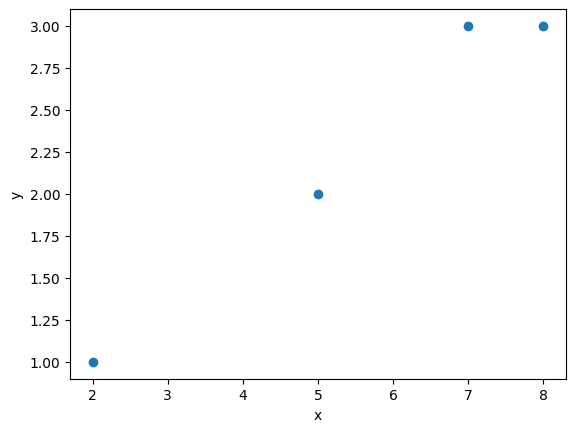

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# I'm using numpy matricies here because they allow for elementary matrix
# calculations, where numpy arrays don't always.

X = np.matrix([[1, 2],
               [1, 5],
               [1, 7],
               [1, 8]])


y = np.matrix([[1],
               [2],
               [3],
               [3]])


plt.scatter( np.array(X[:, 1].flatten()), np.array(y.flatten()) )
plt.xlabel('x')
plt.ylabel('y')
plt.show()


$$X^TX\beta = X^T \textbf{y}$$

$$X^TX= \left[\begin{array}{cccc}
 1 & 1 & 1 & 1  \\
2 & 5 & 7 & 7
\end{array}\right]\left[\begin{array}{cc}
 1 & 2  \\
 1 & 5 \\
 1 & 7 \\
 1 & 8
\end{array}\right]=\left[\begin{array}{cc}
 4 & 22  \\
22 & 142
\end{array}\right]$$

In [2]:
XT_X = X.T * X
print(XT_X)


[[  4  22]
 [ 22 142]]


$$X^T\textbf{y}= \left[\begin{array}{cccc}
 1 & 1 & 1 & 1  \\
2 & 5 & 7 & 7
\end{array}\right]
\left[\begin{array}{cc}
 1   \\
 2 \\
 3  \\
 3  
\end{array}\right]
=\left[\begin{array}{c}
 9  \\
57
\end{array}\right]$$

In [3]:
XT_y = X.T * y
print(XT_y)

[[ 9]
 [57]]


##### The normal equations are

$$\left[\begin{array}{cc}
 4 & 22  \\
22 & 142
\end{array}\right]\left[\begin{array}{c}
 \beta_0  \\
\beta_1
\end{array}\right] =\left[\begin{array}{c}
 9  \\
57
\end{array}\right] $$

##### Hence

$$
\left[\begin{array}{c}
 \beta_0  \\
\beta_1
\end{array}\right] = \left[\begin{array}{cc}
 4 & 22  \\
22 & 142
\end{array}\right]^{-1}\left[\begin{array}{c}
 9  \\
57
\end{array}\right]= \left[\begin{array}{c}
 2/7  \\
5/14
\end{array}\right]$$

In [4]:
beta = np.linalg.inv(XT_X) * XT_y
beta = np.array(beta)
print(f'Thus the least-squares line has the equation {beta[0]}+{beta[1]}x')

Thus the least-squares line has the equation [0.28571429]+[0.35714286]x


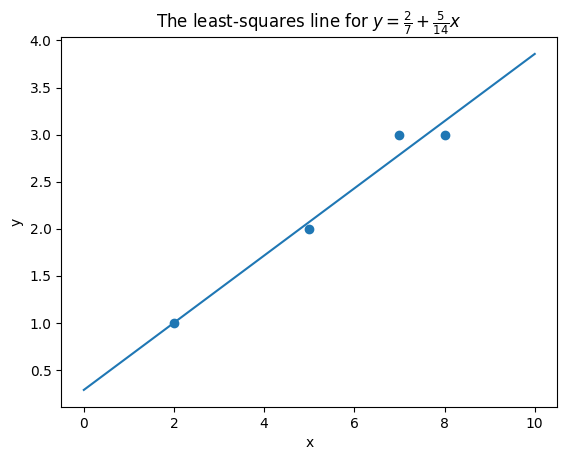

In [5]:
import matplotlib.pyplot as plt

x = np.linspace(0,10,  100)

def f(x):
    return 2/7 + 5/14 * x

plt.scatter( np.array(X[:, 1].flatten()), np.array(y.flatten()) )
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'The least-squares line for $y=\frac{2}{7}+\frac{5}{14}x$')
plt.show()


### Now we can compare our numerical solution to an API one using sklearn.

##### And we achieve the same answer. The only computation we have to do is take the transpose of $X$ and increase its dimension size to $\mathbb{R}^2$

In [6]:
from sklearn.linear_model import LinearRegression
# I'm using numpy arrays because numpy matricies are not supported in the sklearn
# library. As a general rule, I like to use numpy matricies to
# for manual matrix calculations and arrays for API's like sklearn.
X = np.array([2,5,7,8])

y = np.array([1,2,3,3,])

x_T = np.array((X, )).T

reg = LinearRegression().fit(x_T,y)

print(f'y={reg.coef_}x +  {reg.intercept_}')



y=[0.35714286]x +  0.2857142857142865


##### Authored by Logan Kronfrost

##### Textbook reference: Linear algebra and its applications / David C. Lay, University of Maryland, College Park, Steven R. Lay, Lee University, Judi J. McDonald, Washington State University. – Fifth edition.